# Axiální složka elektrického pole -- všechny elektrody samostatně

Nyní uvažujeme obecnější případ, kdy všechny elektrody mohou mít různé amplitudy a fáze buzení. Vzhledem k symetrii můžeme předpokládat, že pole na ose $z$ generované jednou radiální elektrodou je poloviční vzhledem k poli generovaném párem radiálních elektrod. Můžeme tedy využít předchozích dat z COmsolu.

In [1]:
# import jednotlivych osovych poli z comsolu
# 13 - par rad. el. y
# 24 - par rad. el. x
# 5 - axialni elektroda z-
# 6 - axialni elektroda z+

# ze symetrie: E_13 = E_24
#              E_5(z) = - E_6(-z)

using DelimitedFiles

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,2]
#E_field_ax_data_old = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_ax_data = readdlm("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,3] # spravna poloha axialnich elektrod
E_field_rad_data_par = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,4]
#E_field_rad_data_par = readdlm("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,4]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
                                                # generovanem parem radialnich elektrod

leng_data = length(z_data)
# nyni mam nacteny data ve stejnych bodech

50000

In [3]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

Predpokladam na vsech elektrodach rozdilne faze a amplitudy napeti. Elektrod je celkem 6, tzn. mame 12 parametru.

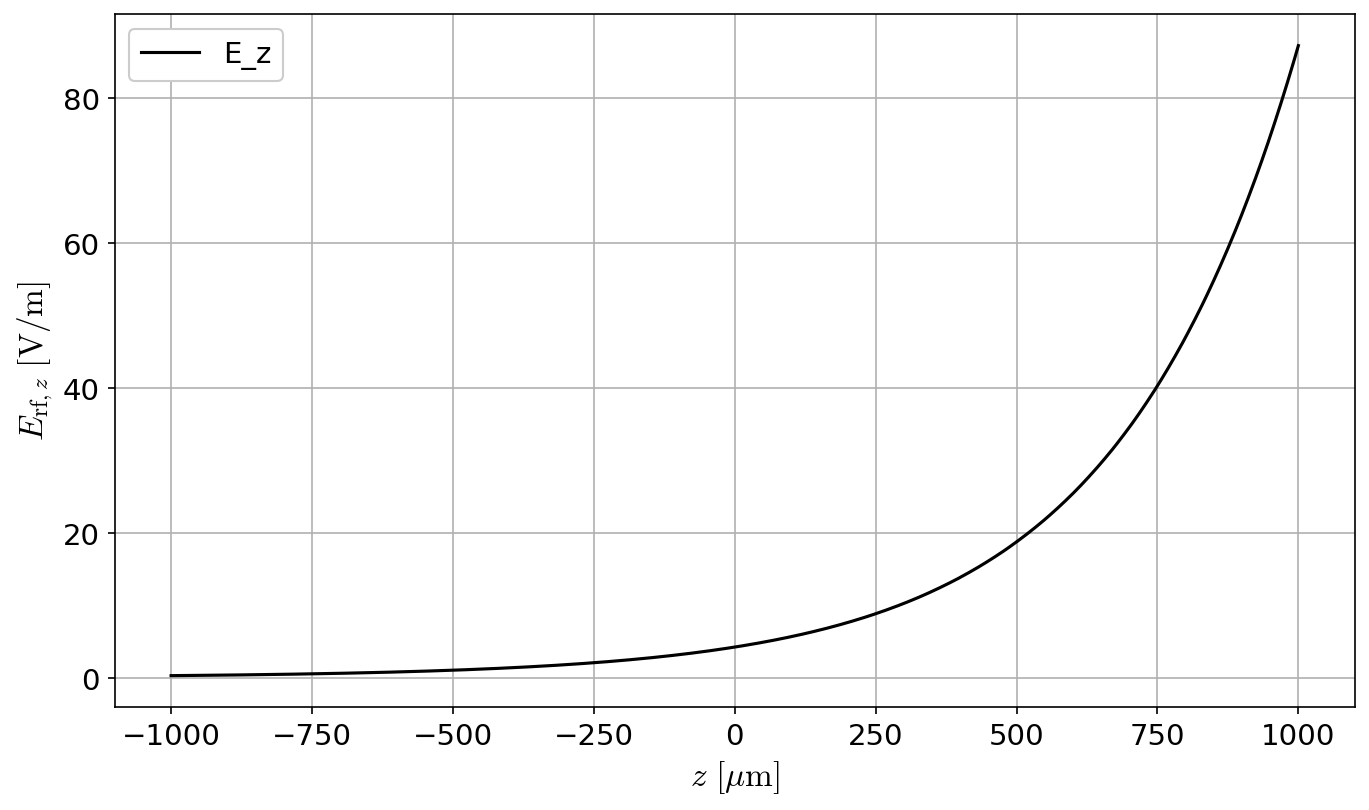

PyObject <matplotlib.legend.Legend object at 0x7fa0c8166810>

In [15]:
# napeti a faze na elektrodach pasti
Vrf_1 = 0
Vrf_3 = 0
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 0
Vrf_6 = 1
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

phi_1 = -0.1
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0
phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6];


# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] .* exp.(phi[5] * 1im )
ax_6_amp = Vrf[6] .* exp.(phi[6] * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

E_rf_complex = rad_amp * E_field_rad_data_jedna .+ ax_5_amp * (- reverse(E_field_ax_data) ) .+ ax_6_amp * E_field_ax_data


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)

# E_rf_amp_aux = abs.(E_rf_complex)

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")


# line1 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="black", label="E_z")
line1 = x.plot(z_data*1e3,
    E_rf_amp, color="black", label="E_z")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     abs.(600*E_field_rad_data_par_old[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]), color="red", label="E_z")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

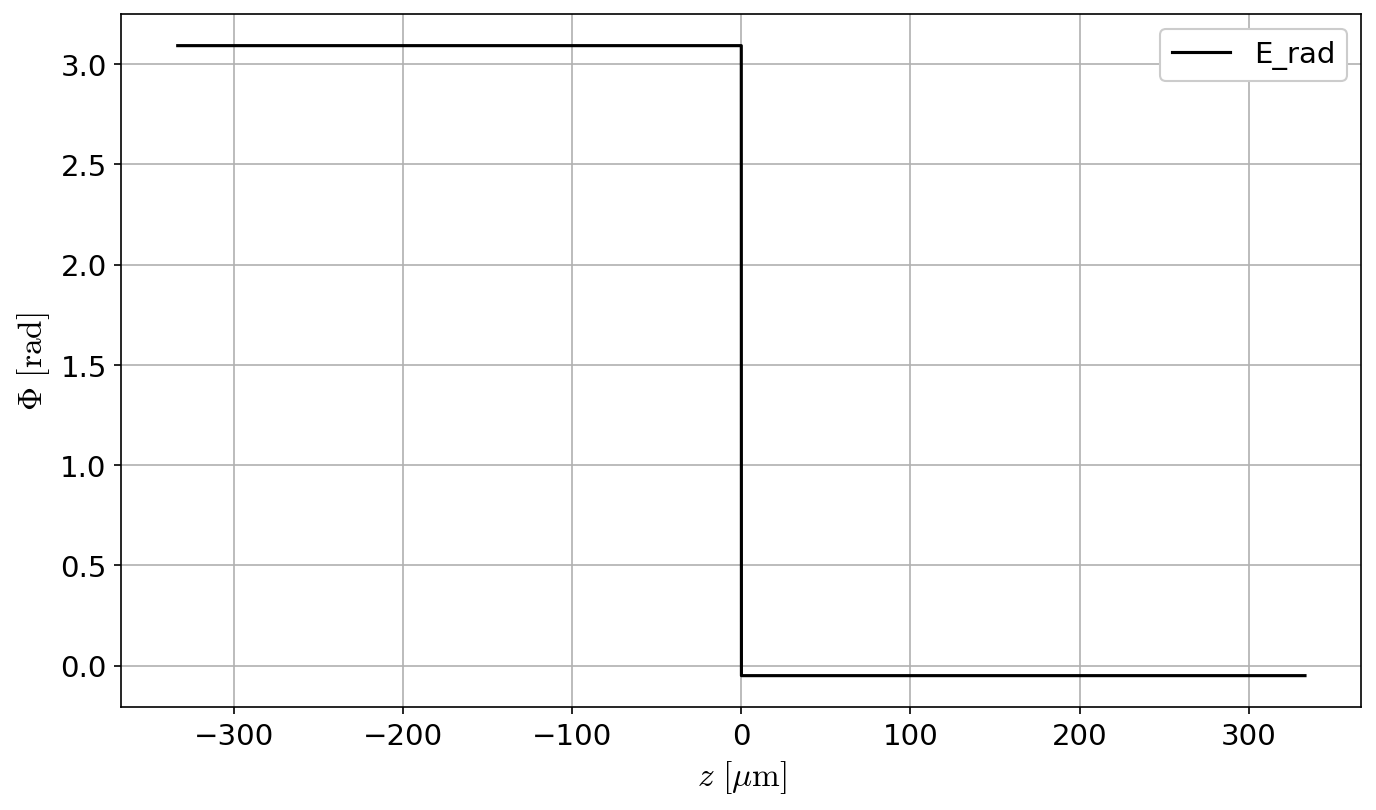

PyObject <matplotlib.legend.Legend object at 0x7f32087e91d0>

In [6]:
figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")


line1 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
    E_rf_phase[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="black", label="E_rad")
#line1 = x.plot(z_data*1e3,E_rf_amp, color="black", label="E_rad")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\Phi \, \, \rm{[rad]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

dale pridam moznost, ze axialni elektrody nejsou v idealnich pozicich

In [4]:
# definuju interpolacni fce

py"""
from scipy import interpolate

def pyinterp(z, E_field_data):
    return interpolate.interp1d(z, E_field_data, kind='quadratic')

"""
E_field_ax = py"pyinterp"(z_data, E_field_ax_data) # z zadavam v mm
E_field_rad_jedna = py"pyinterp"(z_data, E_field_rad_data_jedna)

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7f73e098d4d0>

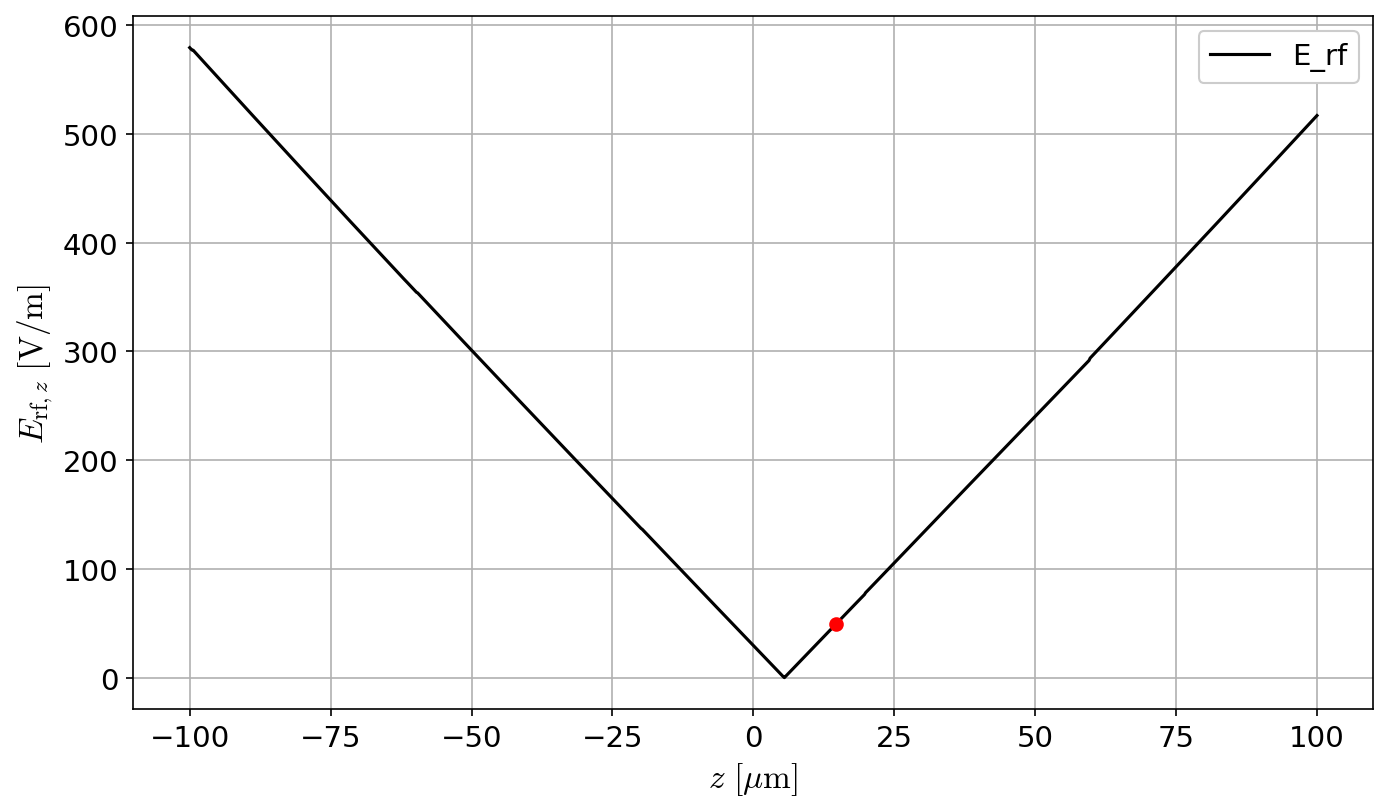

5.505505505505505

PyObject <matplotlib.legend.Legend object at 0x7f7b57040e50>

In [17]:
# napeti a faze na elektrodach pasti
Vrf_1 = 520
Vrf_3 = 520
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 31.5
Vrf_6 = 31.5
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

U_dc_5 = 576.89
U_dc_6 = 423.11

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0
phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6];
delta_z_ax = [-40, -40]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody
#delta_z_ax = [0, 0] # delta z 5, delta z 6

# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] .* exp.(phi[5] * 1im )
ax_6_amp = Vrf[6] .* exp.(phi[6] * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

#osa z
z_range = range(-0.1,0.1, length=1000)
E_rf_complex = rad_amp * E_field_rad_jedna(z_range) .- ax_5_amp * E_field_ax(-(z_range.-delta_z_ax[1]) ) .+ 
                ax_6_amp * E_field_ax(z_range.-delta_z_ax[2])


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)

E_rf_amp_aux = abs.(E_rf_complex)

# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = -U_dc_5 * E_field_ax(-(z_range.-delta_z_ax[1]) ) + U_dc_6 * E_field_ax(z_range.-delta_z_ax[2])
# index pruchodu nulou
min_ind = argmin(abs.(E_field_ax_dc)) # index nuloveho DC pole
z_pos_iont = z_range[ min_ind ] # pozice iontu

#poloha uzlu RF pole
z_rf_node = z_range[ argmin(E_rf_amp) ]
print(z_rf_node*1e3)

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot(z_range*1e3,E_rf_amp, color="black", label="E_rf")
line2 = x.plot(z_pos_iont*1e3, E_rf_amp[min_ind], "o", color="red")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

otestovano, funguje!

nyni zmenim RF napeti na axialnich elektrodach podobne jako v experimentu:

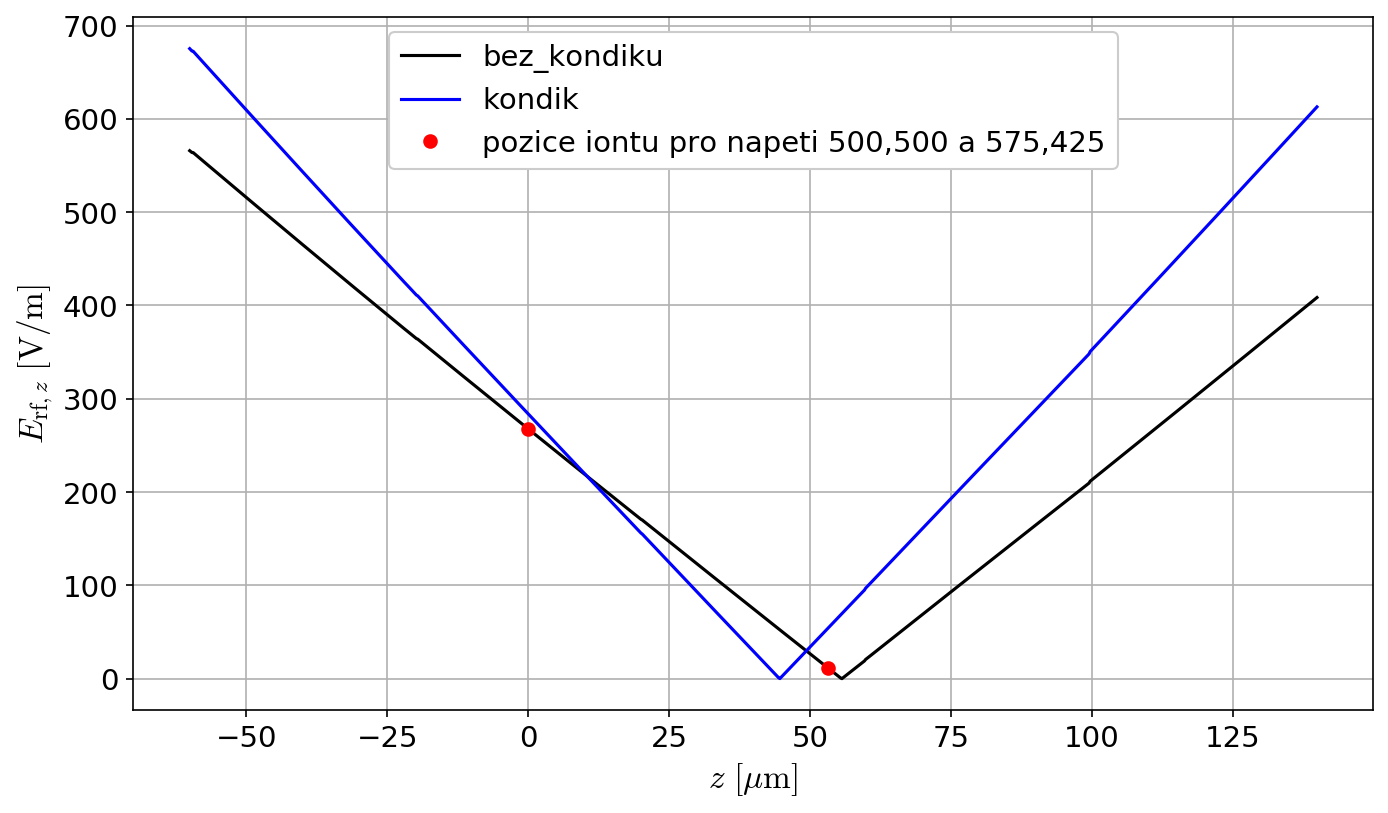

15.715715715715714

In [8]:
# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_3 = 500
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 42.5
Vrf_6 = 50
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

U_dc_5 = [575, 500]
U_dc_6 = [425, 500]
# U_dc_5 = 575
# U_dc_6 = 425

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0
phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6];
delta_z_ax = [-40, -40]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody
#delta_z_ax = [0, 0] # delta z 5, delta z 6

# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] .* exp.(phi[5] * 1im )
ax_6_amp = Vrf[6] .* exp.(phi[6] * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

#osa z
z_range = range(-0.1,0.1, length=1000)
E_rf_complex = rad_amp * E_field_rad_jedna(z_range) .- ax_5_amp * E_field_ax(-(z_range.-delta_z_ax[1]) ) .+ 
                ax_6_amp * E_field_ax(z_range.-delta_z_ax[2])


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)

#E_rf_amp_aux = abs.(E_rf_complex)

# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = -1 .* U_dc_5' .* E_field_ax(-(z_range.-delta_z_ax[1]) ) .+ U_dc_6' .* E_field_ax(z_range.-delta_z_ax[2])
# index pruchodu nulou
min_ind1 = argmin(abs.(E_field_ax_dc), dims=1)[1][1] # index nuloveho DC pole
min_ind2 = argmin(abs.(E_field_ax_dc), dims=1)[2][1] # index nuloveho DC pole
min_ind = [min_ind1, min_ind2]
z_pos_iont = z_range[min_ind] # pozice iontu
# z_pos_iont = z_range[min_ind1]

#poloha uzlu RF pole
z_rf_node = z_range[ argmin(E_rf_amp) ]
print(z_rf_node*1e3)

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot((z_range.-z_pos_iont[2])*1e3,E_rf_amp, color="black", label="bez_kondiku")
# line2 = x.plot(z_pos_iont*1e3, E_rf_amp[min_ind], "o", color="red")
line3 = x.plot((z_range.-z_pos_iont[2])*1e3, E_rf_amp_aux, color="blue", label="kondik")
line2 = x.plot((z_pos_iont.-z_pos_iont[2])*1e3, E_rf_amp[min_ind], "o", color="red", label="pozice iontu pro napeti 500,500 a 575,425")
#line4 = x.plot(z_range*1e3, abs.(E_field_ax_dc))
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)


savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/axial_E_field/axial_E_field_bezcond_cond.png", 
           bbox_inches="tight")

To vypada dost zajimave, tvar temer stejny jako v experimentu. Ze by trefa?

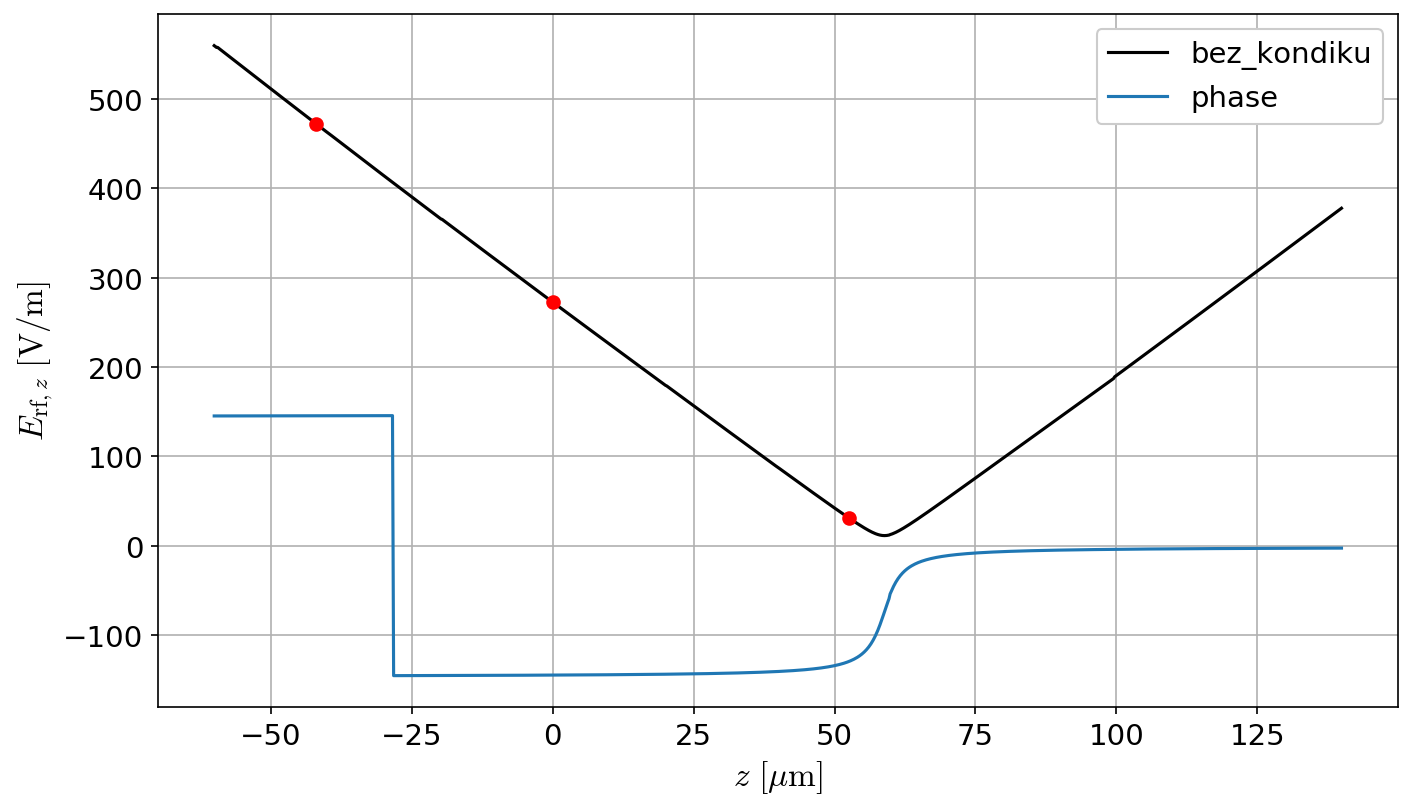

18.91891891891892

PyObject <matplotlib.legend.Legend object at 0x7f73e016ac50>

In [6]:
# zde tento model na hrani:

# napeti a faze na elektrodach pasti
Vrf_1 = 500
Vrf_3 = 500
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 42.5
Vrf_6 = 50
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

U_dc_5 = [575, 500, 440] # druhy prvek urcuje nulu ztove osy
U_dc_6 = [425, 500, 560]
# U_dc_5 = 575
# U_dc_6 = 425

phi_1 = 0
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0.1
phi_6 = 0.1
phi = [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6];
delta_z_ax = [-0, -80]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody
#delta_z_ax = [0, 0] # delta z 5, delta z 6

# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] .* exp.(phi[5] * 1im )
ax_6_amp = Vrf[6] .* exp.(phi[6] * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

#osa z
z_range = range(-0.1,0.1, length=1000)
E_rf_complex = rad_amp * E_field_rad_jedna(z_range) .- ax_5_amp * E_field_ax(-(z_range.-delta_z_ax[1]) ) .+ 
                ax_6_amp * E_field_ax(z_range.-delta_z_ax[2])


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)

#E_rf_amp_aux = abs.(E_rf_complex)

# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = -1 .* U_dc_5' .* E_field_ax(-(z_range.-delta_z_ax[1]) ) .+ U_dc_6' .* E_field_ax(z_range.-delta_z_ax[2])
# index pruchodu nulou
min_ind1 = argmin(abs.(E_field_ax_dc), dims=1)[1][1] # index nuloveho DC pole
min_ind2 = argmin(abs.(E_field_ax_dc), dims=1)[2][1] # index nuloveho DC pole
min_ind3 = argmin(abs.(E_field_ax_dc), dims=1)[3][1] # index nuloveho DC pole
min_ind = [min_ind1, min_ind2, min_ind3]
z_pos_iont = z_range[min_ind] # pozice iontu
# z_pos_iont = z_range[min_ind1]

#poloha uzlu RF pole
z_rf_node = z_range[ argmin(E_rf_amp) ]
print(z_rf_node*1e3)

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot((z_range.-z_pos_iont[2])*1e3,E_rf_amp, color="black", label="bez_kondiku")
line3 = x.plot((z_range .- z_pos_iont[2])*1e3, E_rf_phase/max.(abs.(E_rf_phase)) * max.(E_rf_amp)*0.5 , label="phase")
# line2 = x.plot(z_pos_iont*1e3, E_rf_amp[min_ind], "o", color="red")
#line3 = x.plot((z_range.-z_pos_iont[2])*1e3, E_rf_amp_aux, color="blue", label="kondik")
line2 = x.plot((z_pos_iont.-z_pos_iont[2])*1e3, E_rf_amp[min_ind], "o", color="red")
#line4 = x.plot(z_range*1e3, abs.(E_field_ax_dc))
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

## Axialni pole v zavislosti na ruznych fazich postupne

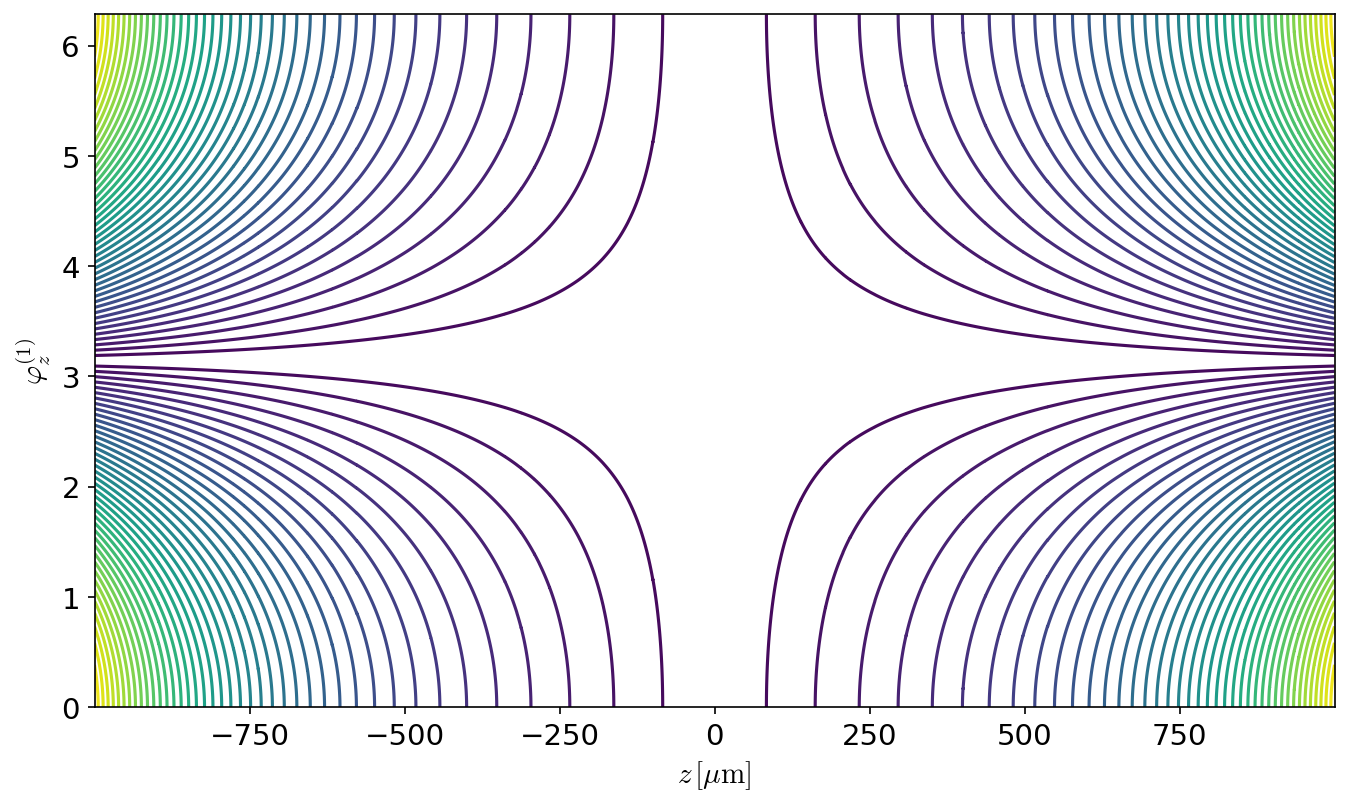

PyObject Text(53.00058593750003, 0.5, '$\\varphi_{z}^{(1)}$')

In [32]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 0
Vrf_6 = 0
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

phi_1 = range(0, 2*pi, length=200)
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = 0
phi_6 = 0
phi = [phi_2, phi_3, phi_4, phi_5, phi_6];


# superpozice poli
rad_amp = sum( Vrf[2:4] .* exp.(phi[2:4] * 1im ) ) .+ Vrf[1] * exp.(phi_1' * 1im)
ax_5_amp = Vrf[5] .* exp.(phi_5 * 1im )
ax_6_amp = Vrf[6] .* exp.(phi_6 * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

E_rf_complex = rad_amp .* E_field_rad_data_jedna .+ ax_5_amp * (- reverse(E_field_ax_data) ) .+ ax_6_amp * E_field_ax_data


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)



# colormap
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

contour(z_data*1e3, Array(phi_1), E_rf_amp', 60)
xlabel(L"$z \, \rm [\mu m]$")
ylabel(L"$\varphi_{z}^{(1)}$")

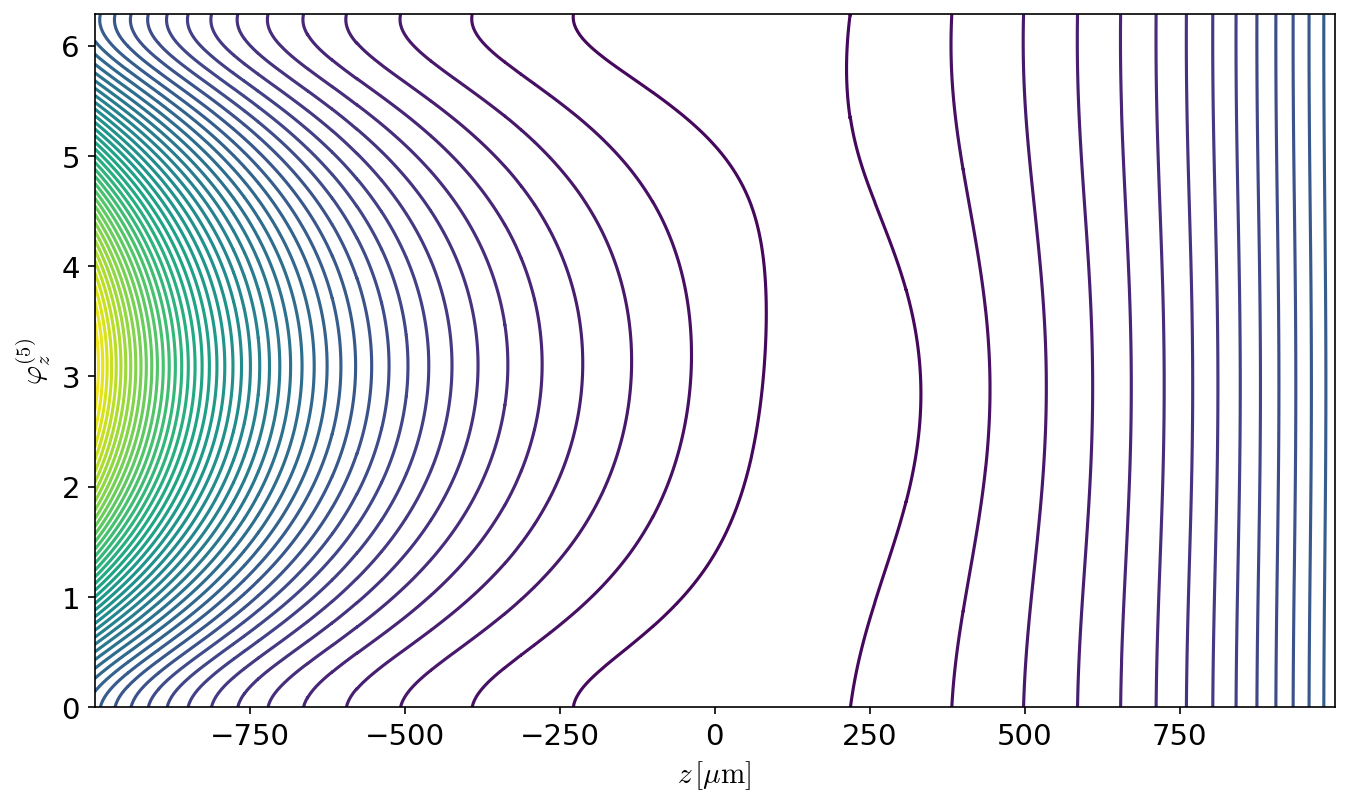

PyObject Text(53.00058593750003, 0.5, '$\\varphi_{z}^{(5)}$')

In [25]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 148
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 40
Vrf_6 = 40
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

phi_1 = -0.1
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_5 = range(0, 2*pi, length=200)
phi_6 = 0.1
phi = [phi_1, phi_2, phi_3, phi_4, phi_6];


# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] * exp.(phi_5' * 1im)
ax_6_amp = Vrf[6] .* exp.(phi_6 * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

E_rf_complex = rad_amp .* E_field_rad_data_jedna .+ ax_5_amp .* (- reverse(E_field_ax_data) ) .+ ax_6_amp * E_field_ax_data


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)



# colormap
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

contour(z_data*1e3, Array(phi_5), E_rf_amp', 60)
xlabel(L"$z \, \rm [\mu m]$")
ylabel(L"$\varphi_{z}^{(5)}$")

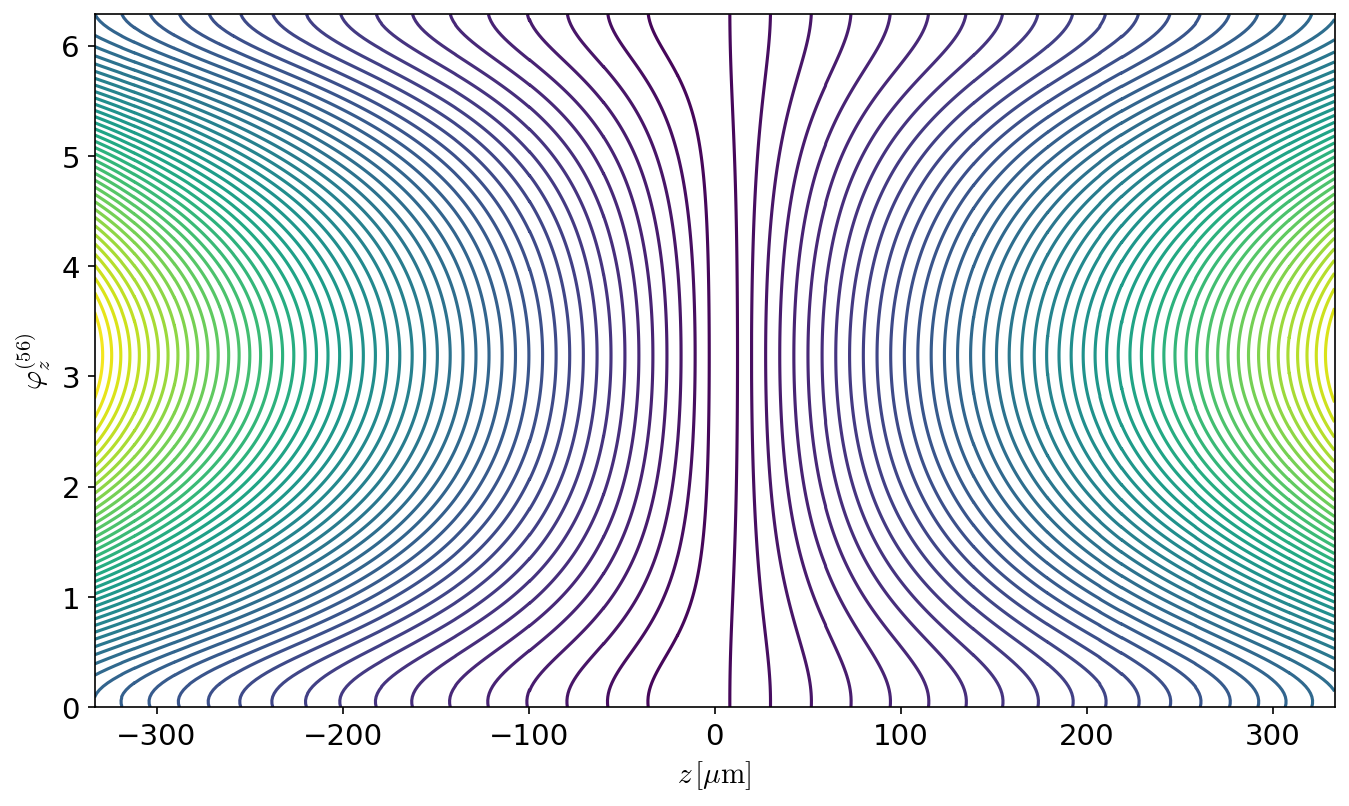

PyObject Text(53.00058593750003, 0.5, '$\\varphi_{z}^{(56)}$')

In [28]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_2 = 0
Vrf_4 = 0
Vrf_5 = 38
Vrf_6 = 35
Vrf = [Vrf_1, Vrf_2, Vrf_3, Vrf_4, Vrf_5, Vrf_6]

phi_1 = 0.1
phi_2 = 0
phi_3 = 0
phi_4 = 0
phi_56 = range(0, 2*pi, length=200)

phi = [phi_1, phi_2, phi_3, phi_4];


# superpozice poli
rad_amp = sum( Vrf[1:4] .* exp.(phi[1:4] * 1im ) )
ax_5_amp = Vrf[5] * exp.(phi_56' * 1im)
ax_6_amp = Vrf[6] .* exp.(phi_56' * 1im )
#E_rf_rad_complex = ( Vrf_1 * exp( phi_1* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 

E_rf_complex = rad_amp .* E_field_rad_data_jedna .+ ax_5_amp .* (- reverse(E_field_ax_data) ) .+ ax_6_amp .* E_field_ax_data


# amplituda a faze
E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)



# colormap
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

#contourf(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3, Array(phi_56), 
#    E_rf_amp[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3),:]', 60)
contour(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3, Array(phi_56), 
    E_rf_amp[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3),:]', 60)
xlabel(L"$z \, \rm [\mu m]$")
ylabel(L"$\varphi_{z}^{(56)}$")

Zdá se, že dvě minima nejsem schopen najít. Prej se dvě minima objevovali při měření průmětu mikropohybu do směru $xz$ a ne jen čistě $z$, takže bych se to za každou cenu najít nesnažil.